##  Natural Language Processing 2024 – Ex. 1
In this exercise we will be using the Reuters (business and financial news) corpus. The corpus consists of 10,788 news documents totaling 1.3 million words. These documents span 90 categories and are split into train and test. For more details, please see https://www.nltk.org/book/ch02.html. 
We provide a read_corpus function below that pulls out only articles from the "earn" category (i.e. news articles about finance)

In [191]:
"""Submitted by Rotem Kashani 209073352 and David Koplev 208870279"""
import pprint
import nltk
import re
import pandas as pd
from collections import Counter
from nltk import pos_tag
from nltk.corpus import wordnet
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity
from gensim.test.utils import datapath, get_tmpfile
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from nltk.corpus import reuters
import numpy as np
nltk.download('averaged_perceptron_tagger')
nltk.download('reuters')
START_TOKEN = '<START>'
END_TOKEN = '<END>'
DIGIT_TOKEN = '<DIGIT>'
UNK_TOKEN = '<UNK>'

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


### Question 1: Preprocessing  [code & written]:
Preprocess the text by:
- Add `<START>` and `<END>` tokens to each of the documents
- Replace numbers (words consisting of only digits and commas) with the string: `<DIGIT>`
- Replace any non-english names and phrases with the `<UNK>` token
- You should think of at least two more things to do...

In [192]:
def read_corpus(category="earn"):
    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files
    """
    files = reuters.fileids(category)
    
    # Initialize an empty list to store the list of words from each file
    corpus = []
    # ------------------
    # Write your implementation here.
    for file_id in files:
        # Read the words from the current file and convert to a list
        words = list(reuters.words(file_id))
        
        # Add <START> and <END> tokens to the document
        words = [START_TOKEN] + words + [END_TOKEN]
        
        # Replace numbers with <DIGIT>
        words = [DIGIT_TOKEN if word.isdigit() or (',' in word and all(char.isdigit() or char == ',' for char in word)) else word for word in words]
        
        # Replace non-English names and phrases with <UNK>
        words = [UNK_TOKEN if not word.isascii() else word for word in words]
        
        # Add the processed document to the corpus
        corpus.append(words)

    # return list of lists: for every file- create a list from the words inside. Then create a list containing all the file's lists.
    # ------------------
    return corpus

#### Open question
Which preprocessing tasks you added and why?


#### <font color="red">Write your answer here.</font>
First we created a list named "words" which held all the words in each file divided by file_id for recognition.
Than we took each file id and added a start and end flag (<START> <END>) as requested.
While running on the words in each document if we found a word that consists from only numbers or the char "," we labeled it as a digit token (<DIGIT>)
If we found any none English \ unique words we labeled them as UNK (<UNK>)
Of course we did all that into the words lists and appended each time for the amount needed

Let's have a look what these documents are like….

In [193]:
reuters_corpus = read_corpus()

pprint.pprint(reuters_corpus[:3], compact=True, width=100)

[['<START>', 'AMATIL', 'PROPOSES', 'TWO', '-', 'FOR', '-', 'FIVE', 'BONUS', 'SHARE', 'ISSUE',
  'Amatil', 'Ltd', '&', 'lt', ';', 'AMAA', '.', 'S', '>', 'said', 'it', 'proposes', 'to', 'make',
  'a', 'two', '-', 'for', '-', 'five', 'bonus', 'issue', 'out', 'of', 'its', 'revaluation',
  'reserve', 'to', 'shareholders', 'registered', 'May', '<DIGIT>', '.', 'Shareholders', 'will',
  'be', 'asked', 'to', 'approve', 'the', 'issue', 'and', 'an', 'increase', 'in', 'authorised',
  'capital', 'to', '<DIGIT>', 'mln', 'shares', 'from', '<DIGIT>', 'mln', 'at', 'a', 'general',
  'meeting', 'on', 'May', '<DIGIT>', '<DIGIT>', 'it', 'said', 'in', 'a', 'statement', '.', 'The',
  'new', 'shares', 'will', 'rank', 'for', 'dividends', 'declared', 'after', 'October', '<DIGIT>',
  '.', 'Amatil', '<DIGIT>', 'in', 'which', 'B', '.', 'A', '.', 'T', '.', 'Industries', 'Plc', '&',
  'lt', ';', 'BTI', '.', 'L', '>', 'holds', 'a', '<DIGIT>', 'pct', 'stake', '<DIGIT>', 'said', 'it',
  'does', 'not', 'expect', 'to', '

### Question 2: Implement `distinct_words` [code] 

Write a method to work out the distinct words (word types) that occur in the corpus. You can do this with `for` loops, but it's more efficient to do it with Python list comprehensions. In particular, [this](https://coderwall.com/p/rcmaea/flatten-a-list-of-lists-in-one-line-in-python) may be useful to flatten a list of lists. If you're not familiar with Python list comprehensions in general, here's [more information](https://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html).

Your returned `corpus_words` should be sorted. You can use python's `sorted` function for this.

You may find it useful to use [Python sets](https://www.w3schools.com/python/python_sets.asp) to remove duplicate words.

In [194]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): sorted list of distinct words across the corpus
            num_corpus_words (integer): number of distinct words across the corpus
    """
    corpus_words = []
    num_corpus_words = -1
    
    # ------------------
    # Write your implementation here.
    # Flatten the list of lists and use a set to automatically remove duplicates
    unique_words_set = set(word for doc in corpus for word in doc)

    # Sort the unique words and convert back to a list
    corpus_words = sorted(list(unique_words_set))
    
    # Count the number of distinct words
    num_corpus_words = len(corpus_words)

    # ------------------

    return corpus_words, num_corpus_words

Let's call the function

In [195]:
distinct_words_list, num_distinct_words = distinct_words(reuters_corpus)
print("Number of Distinct Words:", num_distinct_words)
print("Distinct Words:", distinct_words_list)

Number of Distinct Words: 15734
Distinct Words: ['!', '"', '"(', '",', '".', '"...', '&', "'", "')", '(', ')', '),', '),"', ')-', ')-&', ').', ')."', '):', ',"', ',\'"', ',.', ',;', '-', '-&', '--', '---', '.', '."', '.&', ".''", '.)', '.*', '.,', '.,"', '.-', '..', '...', '...^', '.>', '.>,', '.>.', '/', '05p', '08p', '0p', '10p', '10s', '11p', '12p', '12th', '12ths', '13p', '13th', '14p', '150th', '15p', '16p', '17p', '181p', '187p', '18p', '1970s', '1980s', '1990s', '19p', '1SR', '1ST', '1p', '1st', '21p', '222p', '22nd', '22p', '231p', '23p', '23rd', '242p', '248p', '24p', '25p', '281p', '283p', '286p', '29p', '2CV', '2ND', '2nD', '2nd', '2p', '30p', '316p', '318p', '31p', '33P', '33p', '34p', '35p', '366p', '375p', '37p', '38P', '38p', '3COM', '3RD', '3X', '3nd', '3p', '3rd', '413p', '41p', '421p', '45p', '468p', '47p', '481p', '491p', '499p', '4G', '4RTH', '4TH', '4p', '4th', '4thh', '50s', '51p', '524p', '535p', '537p', '538p', '54p', '56p', '575p', '58p', '590p', '591p', '5p', 

## Part 1: Count-Based Word Vectors 

### Question 3: Implement `compute_co_occurrence_matrix` [code & written] 

Write a method that constructs a co-occurrence matrix for a certain window-size $n$ (with a default of 3), considering words $n$ before and $n$ after the word in the center of the window. 
- Positive point-wise information should be implemented with an “add-2” smoothing.
- You should use `numpy (np)` to represent vectors, matrices, and tensors.
- Pay attention to the open question at the end

In [196]:
def compute_co_occurrence_matrix(corpus, window_size=3,use_ppmi=False):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 3).
    
        Note: Each word in a document should be at the center of a window. Words near edges will have a smaller
              number of co-occurring words.
              
              For example, if we take the document "<START> All that glitters is not gold <END>" with window size of 4,
              "All" will co-occur with "<START>", "that", "glitters", "is", and "not".
    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
            use_ppmi (bool): whether to use Positive Point-wise Mutual Information (PPMI) or not
        Return:
            ?
    """
    words, num_words = distinct_words(corpus)
    
    # ------------------
    # Write your implementation here.
    vocab_size = len(words)
    word_to_index = {word: index for index, word in enumerate(words)}

    co_occurrence_matrix = np.zeros((vocab_size, vocab_size))

    for doc in corpus:
        for center_index, center_word in enumerate(doc):
            center_word_index = word_to_index[center_word]

            # Define the window boundaries
            start = max(0, center_index - window_size)
            end = min(num_words, center_index + window_size + 1)

            context_words = doc[start:end]
            context_word_indices = [word_to_index[word] for word in context_words if word != center_word]

            for context_index in context_word_indices:
                co_occurrence_matrix[center_word_index, context_index] += 1

    # Apply add-2 smoothing
    co_occurrence_matrix += 2

    if use_ppmi:
        # Calculate Positive Point-wise Mutual Information (PPMI)
        row_sums = np.sum(co_occurrence_matrix, axis=1)
        col_sums = np.sum(co_occurrence_matrix, axis=0)
        total_sum = np.sum(co_occurrence_matrix)

        ppmi_matrix = np.log2((co_occurrence_matrix * total_sum) / (row_sums.reshape(-1, 1) * col_sums))
        ppmi_matrix[ppmi_matrix < 0] = 0  # Set negative values to zero
        return ppmi_matrix

    return co_occurrence_matrix


    # ------------------


Execute the function and examine the 30 highest values we received in the matrix

In [197]:
# Print the top values and corresponding words
print("Top 30 largest values in the co-occurrence matrix:")

# ------------------
# Write your implementation here.
corpus = read_corpus()
words,num_words = distinct_words(corpus)
word_to_index = {word: index for index, word in enumerate(words)}


result_matrix = compute_co_occurrence_matrix(corpus, window_size=4, use_ppmi=True)

# Get the indices of the top 30 values in the matrix
top_indices = np.unravel_index(np.argsort(result_matrix, axis=None)[-30:], result_matrix.shape)

# Extract corresponding words
top_words = [(words[top_indices[0][i]], words[top_indices[1][i]]) for i in range(30)]

# Print the top values and corresponding words
for i, (word1, word2) in enumerate(top_words):
    print(f"{i + 1}. Co-occurrence: {result_matrix[word_to_index[word1], word_to_index[word2]]:.2f} - Words: '{word1}', '{word2}'")


# ------------------


Top 30 largest values in the co-occurrence matrix:
1. Co-occurrence: 8.18 - Words: 'QTR', 'NET'
2. Co-occurrence: 8.18 - Words: 'NET', 'QTR'
3. Co-occurrence: 8.21 - Words: '.', 'mln'
4. Co-occurrence: 8.21 - Words: 'mln', '.'
5. Co-occurrence: 8.25 - Words: '>', 'QTR'
6. Co-occurrence: 8.25 - Words: 'QTR', '>'
7. Co-occurrence: 8.26 - Words: 'NOTE', ':'
8. Co-occurrence: 8.26 - Words: ':', 'NOTE'
9. Co-occurrence: 8.33 - Words: 'shrs', 'Avg'
10. Co-occurrence: 8.33 - Words: 'Avg', 'shrs'
11. Co-occurrence: 8.43 - Words: 'cts', 'Net'
12. Co-occurrence: 8.43 - Words: 'Net', 'cts'
13. Co-occurrence: 8.43 - Words: 's', '''
14. Co-occurrence: 8.43 - Words: ''', 's'
15. Co-occurrence: 8.52 - Words: 'lt', '>'
16. Co-occurrence: 8.52 - Words: '>', 'lt'
17. Co-occurrence: 8.52 - Words: '&', '>'
18. Co-occurrence: 8.52 - Words: '>', '&'
19. Co-occurrence: 8.75 - Words: 'vs', '<DIGIT>'
20. Co-occurrence: 8.75 - Words: '<DIGIT>', 'vs'
21. Co-occurrence: 8.77 - Words: '<START>', '&'
22. Co-occurre

#### Open question
Do you spot a glitch? 
If so- which part of the code is to blame for what happened?
How can it be fixed?

#### <font color="red">Write your answer here.</font>
the glitch that occurs is that we can see in the output that we get for example:
"QTR", "NET"
and right after it we get just the opposite:
"NET", "QTR"

To ensure that you only include unique pairs in the top 30 values and their corresponding words, you can modify the code to avoid duplicates. One simple approach is to use a set to keep track of seen pairs.

### Question 4: Construct 4 word-context matrices [code]
1. Download the Simlex-999 file. This file contains pairs of words and their similarity score as given by human annotators.
Implement the read_simlex function below.

2. Implement the compute_co_occurrence_matrix_for_simlex function to create a metrix in which:
- The rows correspond to the words in Simlex. 
- The columns correspond to the most frequent 20,000 words in the reuters corpus. 
- Less frequent words should be ignored.

3. Construct 4 word-context matrices (distributional models), with the following combinations:
a. window of +/-3 words, frequency counts only
b. window of +/-6 words, frequency counts only
c. window of +/-3 words, use PPMI
d. window of +/-6 words, use PPMI



In [198]:
def read_simlex(simlex_path):
    """ Read Simlex-999 file and extract words from it.
        Params:
            simlex_path (str): path to Simlex-999 file
        Return:
            simlex_df (Pandas dataframe): A dataframe that includes the table from the file.
            simlex_words (list): list of words from Simlex-999 pairs
    """
    # ------------------
    # Write your implementation here.
    simlex_df = pd.read_csv(simlex_path)
    simlex_words = list(simlex_df['word1']) + list(simlex_df['word2'])
    # ------------------

    return simlex_df,list(simlex_words)
    
#Read the Simlex-999 file
simlex_path = 'C:/Users/Owner/Downloads/SimLex-999.csv'  # Replace with the actual path to SimLex-999.txt
simlex_df,simlex_words = read_simlex(simlex_path)

In [199]:
def compute_co_occurrence_matrix_for_simlex(corpus, simlex_words, num_most_frequent=20000, window_size=3, use_ppmi=False):
    """ Compute co-occurrence matrix for the given corpus and Simlex-999 words.
    
        Params:
            corpus (list of list of strings): corpus of documents
            simlex_words (list): list of words from Simlex-999 pairs
            num_most_frequent (int): number of most frequent words to consider in the corpus
            window_size (int): size of context window
            use_ppmi (bool): whether to use Positive Point-wise Mutual Information (PPMI) or not
        Return:
            ?
    """
   
   
    
    # ------------------
    # Write your implementation here.
    words, num_words = distinct_words(corpus)
    
   # Use Counter to count word frequencies in the list
    word_counter = Counter(words)
    most_frequent_words = [word for word, _ in word_counter.most_common(num_most_frequent)]

    # Filter Simlex-999 words that are not in the most frequent list
    simlex_words = list(set(simlex_words).intersection(most_frequent_words))
    
    # Get the indices of selected Simlex words
    simlex_word_indices = [word_to_index[word] for word in simlex_words]

    # Initialize co-occurrence matrix
    simlex_matrix = np.zeros((len(simlex_words), num_most_frequent))

    for doc in corpus:
        for center_index, center_word in enumerate(doc):
            if center_word in most_frequent_words:
                center_word_index = word_to_index[center_word]

                # Define the window boundaries
                start = max(0, center_index - window_size)
                end = min(num_words, center_index + window_size + 1)

                context_words = doc[start:end]
                context_word_indices = [word_to_index[word] for word in context_words if word != center_word]

                for context_index in context_word_indices:
                    if context_index in simlex_word_indices:
                        simlex_matrix[simlex_word_indices.index(context_index), center_word_index] += 1

    # Apply add-2 smoothing
    simlex_matrix += 2

    if use_ppmi:
        # Calculate Positive Point-wise Mutual Information (PPMI)
        row_sums = np.sum(simlex_matrix, axis=1)
        col_sums = np.sum(simlex_matrix, axis=0)
        total_sum = np.sum(simlex_matrix)

        ppmi_matrix = np.log2((simlex_matrix * total_sum) / (row_sums.reshape(-1, 1) * col_sums))
        ppmi_matrix[ppmi_matrix < 0] = 0  # Set negative values to zero
        return ppmi_matrix

    return simlex_matrix
    


    # ------------------


In [200]:
# Construct frequency count matrix window of +/-3 words
#Fill your code here
matrix_freq_count_3 = compute_co_occurrence_matrix_for_simlex(corpus, simlex_words, num_most_frequent=20000, window_size=3, use_ppmi=False)

# Construct frequency count matrix window of +/-6 words
#Fill your code here
matrix_freq_count_6 = compute_co_occurrence_matrix_for_simlex(corpus, simlex_words, num_most_frequent=20000, window_size=6, use_ppmi=False)

# Construct PPMI matrix window of +/-3 words
#Fill your code here
matrix_ppmi_3 = compute_co_occurrence_matrix_for_simlex(corpus, simlex_words, num_most_frequent=20000, window_size=3, use_ppmi=True)

# Construct PPMI matrix window of +/-6 words
#Fill your code here
matrix_ppmi_6 = compute_co_occurrence_matrix_for_simlex(corpus, simlex_words, num_most_frequent=20000, window_size=6, use_ppmi=True)

### Question 5: Evaluation [code & written]

1.	Compute the similarity between each pair in the Simlex corpus. Use the cosine measure for computing vector similarity. 

2.	For each model, compute the correlation between the list of similarities induced by the model, and the list of gold-standard similarities supplied with the Simlex corpus.

In [201]:
def compute_cosine_similarity(vec1, vec2):
    """Compute cosine similarity between two vectors."""
    # ------------------
    # Write your implementation here.
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0  # Handle division by zero
    
    return dot_product / (norm_vec1 * norm_vec2)


    # ------------------

In [202]:
def compute_model_similarities(model_matrix, simlex_df, word2ind):
    model_similarities = []
    gold_similarities = []
    # ------------------
    # Write your implementation here.
    for index, row in simlex_df.iterrows():
        word1, word2, gold_similarity = row['word1'], row['word2'], row['SimLex999']
        
        if word1 in word2ind and word2 in word2ind:
            index1, index2 = word2ind[word1], word2ind[word2]

            # Check if indices are within the valid range
            if 0 <= index1 < len(model_matrix) and 0 <= index2 < len(model_matrix[0]):
                vector1, vector2 = model_matrix[index1], model_matrix[index2]
                model_similarity = compute_cosine_similarity(vector1, vector2)
                model_similarities.append(model_similarity)
                gold_similarities.append(gold_similarity)
    # ------------------
    return model_similarities, gold_similarities

In [203]:
# Calculate similarities and correlations for each model
models = {
    "Frequency Window 3": matrix_freq_count_3,
    "Frequency Window 6": matrix_freq_count_6,
    "PPMI Window 3": matrix_ppmi_3,
    "PPMI Window 6": matrix_ppmi_6,
}
correlations = {}
# Iterate over each model and compute correlations
# Calculate Spearman correlation coefficient 
for model_name, model_matrix in models.items():
    model_similarities, gold_similarities = compute_model_similarities(model_matrix, simlex_df, word_to_index)
    correlation, _ = spearmanr(model_similarities, gold_similarities)
    correlations[model_name] = correlation
#Print the correlation
for model_name, correlation in correlations.items():
    print(f"{model_name} Correlation: {correlation:.4f}")

Frequency Window 3 Correlation: nan
Frequency Window 6 Correlation: nan
PPMI Window 3 Correlation: nan
PPMI Window 6 Correlation: nan


#### Open question
What does this mean? 


#### <font color="red">Write your answer here.</font>
The output "nan" in correlation values typically indicates that the Spearman correlation could not be computed
 "nan" stands for "Not a Number" and is used to represent undefined or unrepresentable mathematical results

reasons:
1. Perfect Correlation or No Variability
2. NaNs in the Data.

### Question 6: POS Evaluation [code & written]
Evaluate the correlation between word embedding models and Simlex dataset similarities for different POS tags. 
Print Spearman correlation coefficients for each model and POS tag.

In [204]:

#Fill your code here
def get_pos_tags(word):
    """Get the POS tag for a word using WordNet."""
    synsets = wordnet.synsets(word)
    if synsets:
        return synsets[0].pos()
    else:
        return None

def compute_model_similarities_by_pos(model_matrix, simlex_df, word2ind, pos_tag):
    model_similarities = []
    gold_similarities = []

    pos_simlex_df = simlex_df[simlex_df['POS'].apply(lambda x: all(get_pos_tags(word) == pos_tag for word in x))]

    for index, row in pos_simlex_df.iterrows():
        word1, word2, gold_similarity = row['word1'], row['word2'], row['SimLex999']

        if word1 in word2ind and word2 in word2ind:
            index1, index2 = word2ind[word1], word2ind[word2]

            # Check if indices are within the valid range
            if 0 <= index1 < len(model_matrix) and 0 <= index2 < len(model_matrix[0]):
                vector1, vector2 = model_matrix[index1], model_matrix[index2]
                model_similarity = compute_cosine_similarity(vector1, vector2)
                model_similarities.append(model_similarity)
                gold_similarities.append(gold_similarity)

    return model_similarities, gold_similarities

# Calculate similarities and correlations for each model and each POS tag
def evaluate_model_by_pos(model_name, model_matrix, simlex_df, word2ind):
    correlations_by_pos = {}

    for pos_tag in ['n', 'v', 'a', 'r']:  # 'n' for nouns, 'v' for verbs, 'a' for adjectives, 'r' for adverbs
        model_similarities, gold_similarities = compute_model_similarities_by_pos(model_matrix, simlex_df, word_to_index, pos_tag)
        correlation, _ = spearmanr(model_similarities, gold_similarities)
        correlations_by_pos[pos_tag] = correlation

    # Print correlations for the current model
    print(f"{model_name} Correlations by POS: {correlations_by_pos}")

# Iterate over each model and evaluate by POS
for model_name, model_matrix in models.items():
    evaluate_model_by_pos(model_name, model_matrix, simlex_df, word_to_index)

Frequency Window 3 Correlations by POS: {'n': nan, 'v': nan, 'a': nan, 'r': nan}
Frequency Window 6 Correlations by POS: {'n': nan, 'v': nan, 'a': nan, 'r': nan}
PPMI Window 3 Correlations by POS: {'n': nan, 'v': nan, 'a': nan, 'r': nan}
PPMI Window 6 Correlations by POS: {'n': nan, 'v': nan, 'a': nan, 'r': nan}


#### Open question
What does this mean? 


#### <font color="red">Write your answer here.</font>
The NaN (Not a Number) values in the correlation results indicate that there might be an issue or inconsistency in the data or calculations.

reasons:
1.Data Quality Issue
2.Limited Data
3.Division by Zero
4.No Variability in Data

## Part 2: Prediction-Based Word Vectors 
As discussed in class, prediction-based word vectors have demonstrated better performance, such as word2vec and GloVe (which also utilizes the benefit of counts). 

Here, we shall explore the embeddings produced by GloVe.
First, we need to load the glove vectors. You can use the 100d vectors.

In [205]:
def load_glove_vectors(glove_file):
    glove_vectors = {}
    with open(glove_file, encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_vectors[word] = vector
    return glove_vectors

# Replace 'C:\\Users\\User\\Documents' with the actual path to your GloVe file
data_path = 'C:/Users/Owner/Downloads/glove.6B'
glove_file_path = datapath(data_path + '/glove.6B.100d.txt')
glove_vectors = load_glove_vectors(glove_file_path)

### Question 7: Cosine similarity evaluation using Glove [code & written]
Calculate cosine similarity between word pairs in simlex_df using GloVe vectors. Assess correlation between computed cosine similarities and the list of gold-standard similarities supplied with the Simlex corpus.

In [206]:
# Compute cosine similarity for each row in the dataframe
def calculate_cosine_similarity(word1, word2, glove_vectors):
    if word1 in glove_vectors and word2 in glove_vectors:
        vector1, vector2 = glove_vectors[word1], glove_vectors[word2]
        vector1 = vector1.reshape(1, -1)  # Reshape to match sklearn's cosine_similarity input
        vector2 = vector2.reshape(1, -1)
        similarity = cosine_similarity(vector1, vector2)[0, 0]
        return similarity
    else:
        return None
# Calculate correlation between cosine similarities and SimLex999 scores
simlex_df['CosineSimilarity'] = simlex_df.apply(lambda row: calculate_cosine_similarity(row['word1'], row['word2'], glove_vectors), axis=1)

# Drop rows where cosine similarity couldn't be calculated (e.g., words not in GloVe)
simlex_df = simlex_df.dropna(subset=['CosineSimilarity'])

# Calculate correlation between cosine similarities and SimLex999 scores
correlation, _ = spearmanr(simlex_df['CosineSimilarity'], simlex_df['SimLex999'])

# Print the results
print(f"Correlation between Cosine Similarity and SimLex999: {correlation:.4f}")

Correlation between Cosine Similarity and SimLex999: 0.2975


#### Open question

What does this mean? (Compared to the values we got before)

#### <font color="red">Write your answer here.</font>
A correlation coefficient of 0.2975 indicates a positive correlation between the computed cosine similarity and the gold-standard similarity scores provided in the SimLex999 dataset. The value 0.2975 falls between -1 and 1
In comparison to the NaN (Not a Number) values the computed cosine similarities are capturing some level of similarity between word pairs, as reflected in the SimLex999 dataset.

### Question 8: GloVe Plot Analysis [code & written] 

Plot the 2D GloVe embeddings for the words 'earnings', 'revenue', 'profit', 'income', 'quarterly', 'financial', 'sales', 'stocks', 'dividends', 'shares'

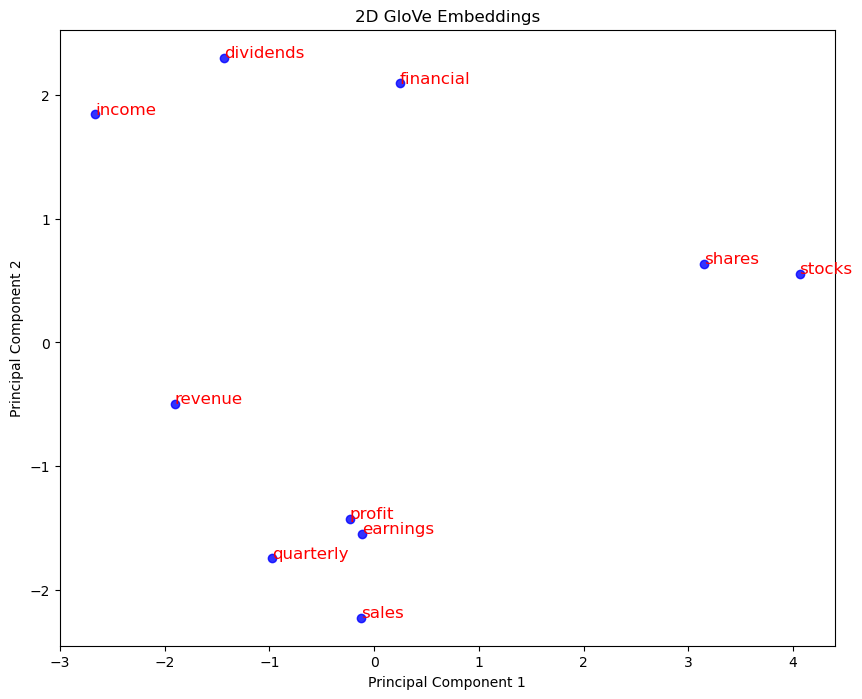

In [207]:
def plot_embeddings(word_list):
    """
    Plot 2D embeddings for a list of target words.

    Parameters:
    - word_list: List of words to be plotted.
    - get_glove_vector: Function to obtain GloVe vectors for words.
    """
     # ------------------
    # Write your implementation here.
    # Get GloVe vectors for the specified words
    vectors = np.array([glove_vectors[word] for word in word_list])

    # Reduce dimensionality using PCA to obtain 2D embeddings
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(vectors)

    # Plot the 2D embeddings
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker='o', color='b', alpha=0.8)

    # Annotate each point with its corresponding word
    for i, word in enumerate(word_list):
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=12, color='r')

    plt.title('2D GloVe Embeddings')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()




    # ------------------
words = ['earnings', 'revenue', 'profit', 'income', 'quarterly', 'financial', 'sales', 'stocks', 'dividends', 'shares']
plot_embeddings(words)


#### Open question

What clusters together in 2-dimensional embedding space? What doesn't cluster together that you think should have? How is the plot different from the one generated earlier from the co-occurrence matrix? What is a possible cause for the difference?

#### <font color="red">Write your answer here.</font>
a logical cluster we got is: profit, earnings, quarterly, all are related to gaining money.
we would think that revenue would be in the same cluster as the cluster we mentioned since it does indicate for profit or earning money usually.
another example for a good cluster would be shares and stocks since they are almost the same thing just in different topics.
this plot is different from the co-occurence matrix in the way of using logic into the matrix in addition to close values.